In [1]:
import glob
import os
import os.path as op
import sys

import matplotlib.pyplot as plt
import numpy as np

factory_dir = r"C:/Users/Alan/Documents/hybridfactory/"
if not factory_dir in sys.path:
    sys.path.insert(0, factory_dir)
    
import factory.io.jrc
import factory.io.raw
import factory.probes.hh2_arseny as hh2_arseny

C:\Users\Alan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [113]:
def mat_svd(X):
    m, n = X.shape
        
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    U = np.matrix(U)
    S = np.matrix(np.diag(S))
    Vt = np.matrix(Vt)
    
    return U, S, Vt

In [140]:
def pca_whiten(X):
    m, n = X.shape
    if m > n:
        raise ValueError("rank incompetence")
        
    _, _, Vt = mat_svd(X)
    return np.sqrt(m)*Vt

def zca_whiten(X):
    m, n = X.shape
    if m > n:
        raise ValueError("rank incompetence")
        
    U, _, Vt = mat_svd(X)
    return np.sqrt(m) * U * Vt

In [4]:
easy1 = r"F:/Spike sorting/2017-10-25-easy1"
spikegl = op.join(easy1, "SpikeGL")

meta = glob.glob(op.join(spikegl, "*.meta"))
bins = glob.glob(op.join(spikegl, "*.bin"))

source = factory.io.raw.open_raw(bins[6], data_type=np.int16, num_channels=256)
event_times = factory.io.jrc.load_event_times(easy1)
event_clusters = factory.io.jrc.load_event_clusters(easy1)

windows = factory.io.raw.unit_windows(source, event_times[(event_times<source.shape[1]-40)&(event_clusters==109)],
                                      samples_before=40, samples_after=40,
                                      car_channels=np.where(hh2_arseny.connected)[0])

In [5]:
with open(meta[36], 'r') as fh:
    metalines = [l.strip() for l in fh.readlines()]

<IPython.core.display.Javascript object>


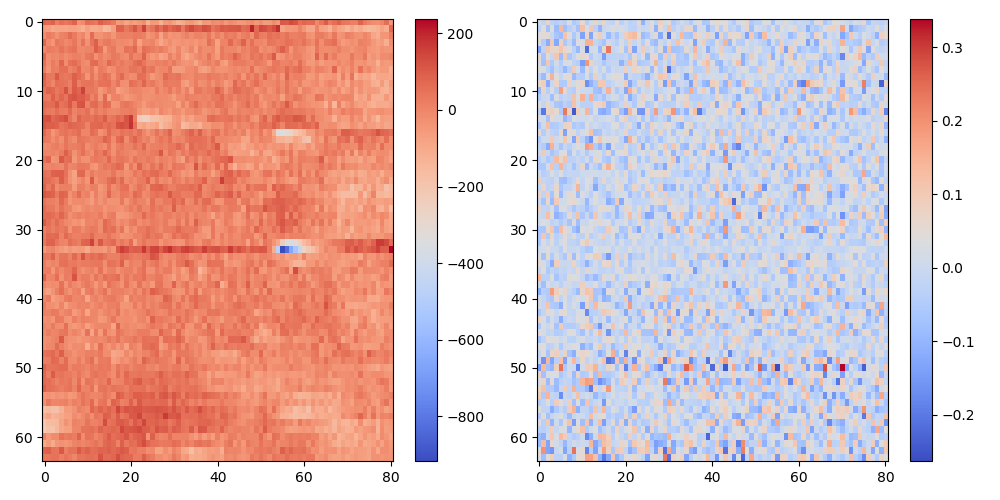

In [13]:
np.random.seed(10191)
k = np.random.choice(windows.shape[2])

X = windows[hh2_arseny.connected,:,k]
W = zca_whiten(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(X, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(W, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.tight_layout()

In [139]:
indices = np.random.permutation(np.arange(m))

<IPython.core.display.Javascript object>


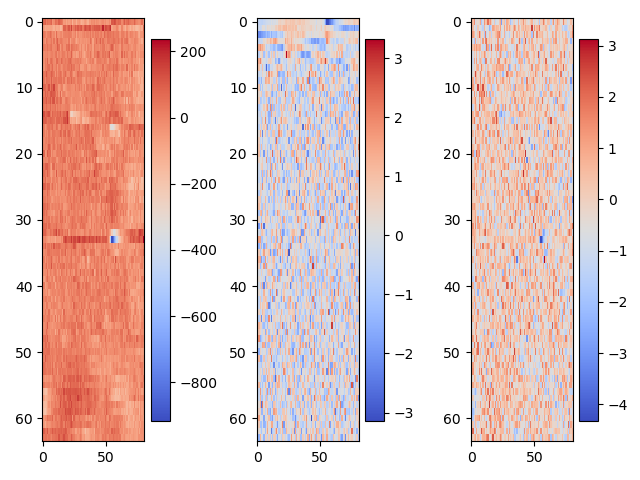

In [155]:
Xwp = pca_whiten(X)
Xwz = zca_whiten(X)

plt.figure()

plt.subplot(1,3,1)
plt.imshow(X, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(Xwp, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(Xwz, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.tight_layout()

<IPython.core.display.Javascript object>


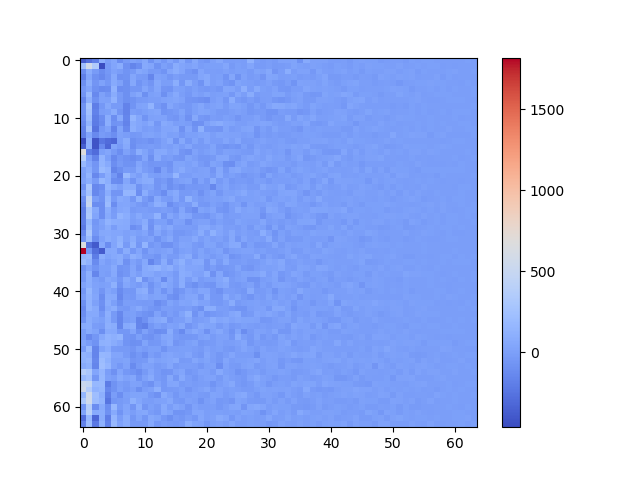

In [166]:
m, n = X.shape

U, S, Vt = mat_svd(X)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(U*S, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()


<IPython.core.display.Javascript object>


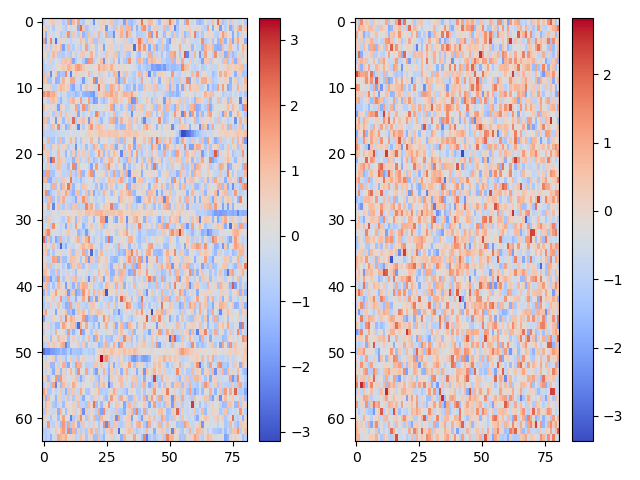

In [162]:

Xwp_perm = np.sqrt(m)*Vt[indices, :]
Xwz_perm = np.sqrt(m)*U*Vt[indices, :]

plt.figure()

plt.subplot(1,2,1)
plt.imshow(Xwp_perm, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(Xwz_perm, "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.tight_layout()

<IPython.core.display.Javascript object>


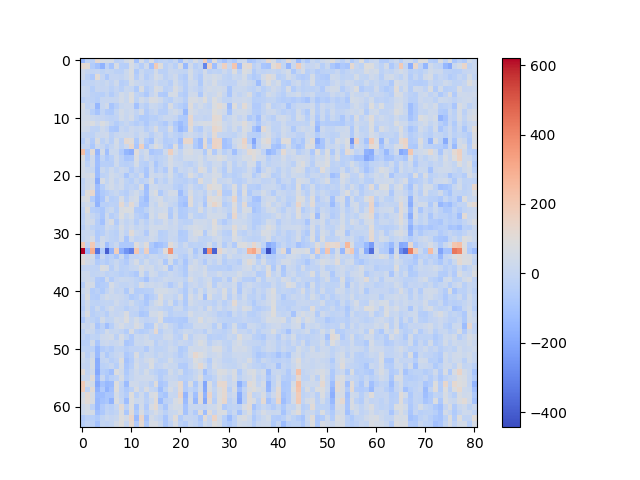

In [164]:
X_perm = U*S*U.T*Xwp_perm/np.sqrt(m)

plt.figure()
plt.imshow(X_perm, "coolwarm", aspect="auto")
plt.colorbar()

<IPython.core.display.Javascript object>


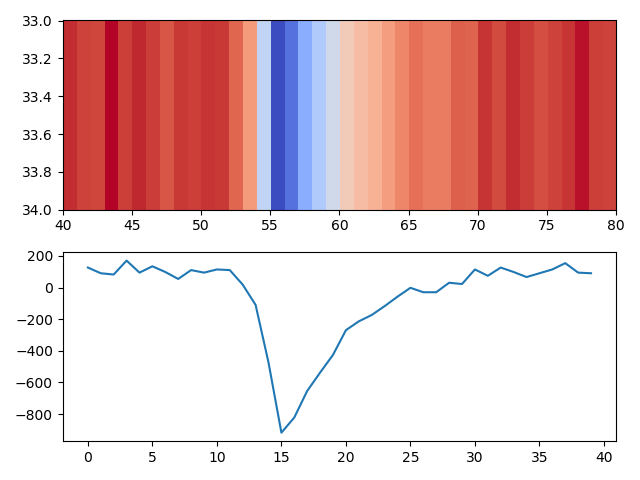

In [127]:
region = X[33, 40:80]

plt.figure()
plt.subplot(2,1,1)
plt.imshow(region, "coolwarm", aspect="auto", interpolation="nearest", extent=(40, 80, 34, 33))

plt.subplot(2,1,2)
plt.plot(region.T)

plt.tight_layout()

In [ ]:
region = X[33, 40:80]

plt.figure()
plt.subplot(2,1,1)
plt.imshow(region, "coolwarm", aspect="auto", interpolation="nearest", extent=(50, 70, 34, 33))

plt.subplot(2,1,2)
plt.plot(region.T)

plt.tight_layout()

In [87]:
# whitening matrix -- i.e., apply it to X on the left and get the whitened X_w
m, n = X.shape

u, s, vt = np.linalg.svd(X)
u = np.matrix(u)
vt = np.matrix(vt)
s = np.matrix()

array([0.11236571, 0.19809763, 0.25576143, 0.30099624, 0.3419925 ,
       0.37412519, 0.40186307, 0.42839962, 0.45294341, 0.47600962,
       0.49731389, 0.51798528, 0.53809623, 0.55712606, 0.57548542,
       0.59342001, 0.6108834 , 0.6275061 , 0.64367772, 0.65949512,
       0.67476613, 0.6895335 , 0.70398288, 0.71813644, 0.73214935,
       0.74523292, 0.75806889, 0.77061551, 0.78268065, 0.79444767,
       0.80565058, 0.81651288, 0.82694237, 0.83713127, 0.84693987,
       0.85648238, 0.86579945, 0.87463956, 0.88307092, 0.89129526,
       0.89925987, 0.90692423, 0.91421474, 0.92125697, 0.92783454,
       0.93398736, 0.93997751, 0.94575909, 0.9512217 , 0.95627139,
       0.96121811, 0.96583094, 0.97033612, 0.97461531, 0.97854868,
       0.98193039, 0.98510159, 0.98799441, 0.99074234, 0.99303124,
       0.99520986, 0.9970688 , 0.99860005, 1.        ])

In [ ]:
np.cumkl diver

In [83]:
s = np.matrix(np.hstack((np.diag(s), np.zeros((m, n-m))))); s[:, :5] = 0
plt.figure()
plt.imshow(u*s*vt, "coolwarm", aspect="auto")
plt.colorbar()

ValueError: all the input arrays must have same number of dimensions

<IPython.core.display.Javascript object>


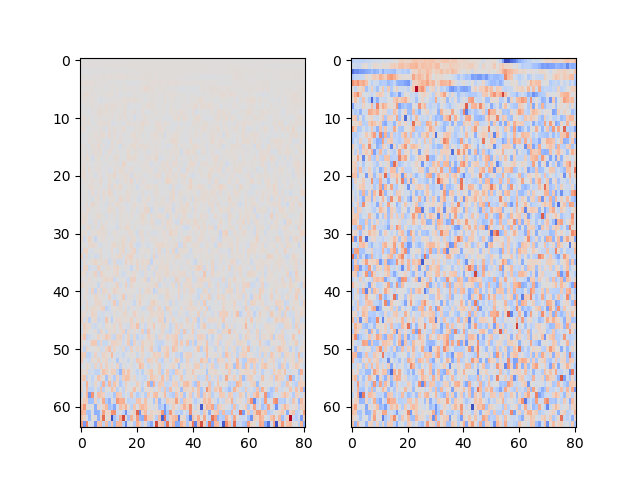

In [79]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(W_pca*X, "coolwarm", aspect="auto")

plt.subplot(1,2,2)
plt.imshow(X_pca_whitened, "coolwarm", aspect="auto")